In [35]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [55]:
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float64)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [62]:

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

In [84]:
def harris_corner_detection(image, k = 0.04, window_size = 3, threshold_ratio = 0.01):
    """
        k: 0.04 is sensitivity factory, it can be from 0.04 to 0.06, commonly 0.04 is used
        threshold_ration: threshold relative to the max R val.
    """
    # Find the gradients, sobel used mainly as edge detector.
    Ix = convolve2d(image, sobel_x)
    Iy = convolve2d(image, sobel_y)
    plt.title("Edge Detector - Ix sobel_x output")
    plt.imshow(Ix, cmap = 'gray')
    plt.show()
    
    # Product of derivative
    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy
    
    
    plt.title("Edge Detector - Product Derivate Ix sobel_x output")
    plt.imshow(Ixx, cmap = 'gray')
    plt.show()
    
    # Calculation sum of the gradient over a window
    box_kernel = np.ones((window_size, window_size))
    Sxx = convolve2d(Ixx, box_kernel)
    Syy = convolve2d(Iyy, box_kernel)
    Sxy = convolve2d(Ixy, box_kernel)
    
    # Compute Harris response R
    det_M = Sxx * Syy - Sxy ** 2
    trace_M = Sxx + Syy
    R = det_M - k * (trace_M ** 2)
    
    plt.title("Edge Detector - Sum of grad Ix sobel_x output")
    plt.imshow(Sxx, cmap = 'gray')
    plt.show()
    
    
    plt.title("Edge Detector - Cross of grad output")
    plt.imshow(Sxx * Syy, cmap = 'gray')
    plt.show()
    
    
    plt.title("Harris Response")
    plt.imshow(R, cmap = 'gray')
    plt.show()
    
    # Thresholding to detect corners
    R_max = np.max(R)
    threshold = threshold_ratio * R_max
    corners = np.argwhere(R > threshold)
    
    return R, corners
    

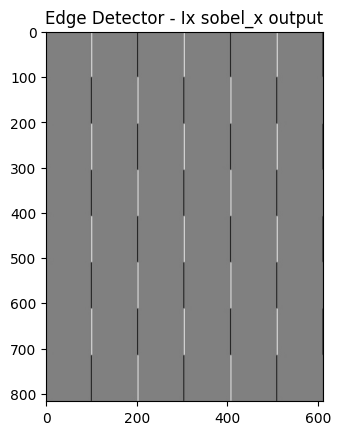

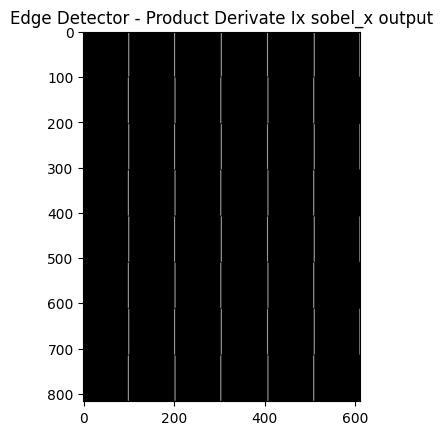

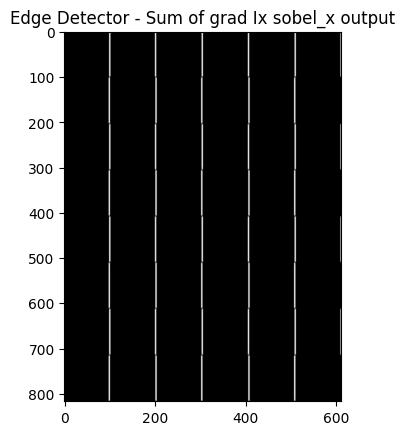

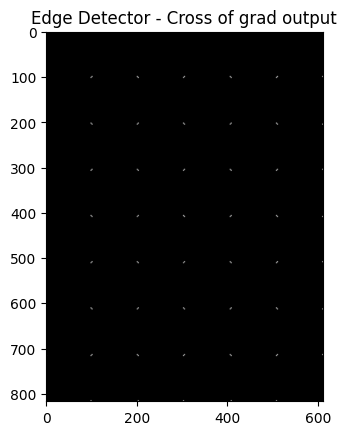

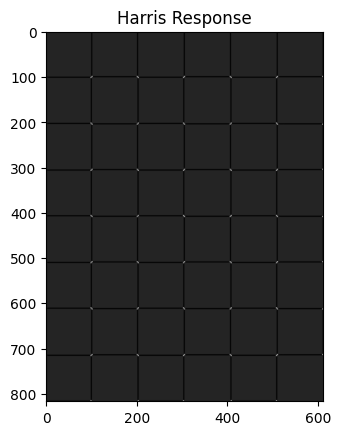

[[  0 100]
 [  0 101]
 [  0 102]
 ...
 [816 507]
 [816 508]
 [816 509]]


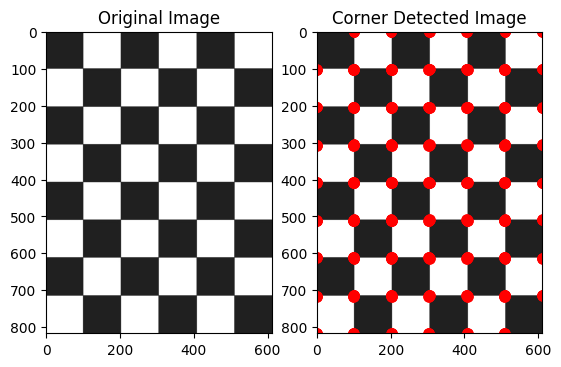

In [92]:
# image = np.zeros((100, 100), dtype=np.uint8)
# image[30:70, 30:70] = 255

image = cv2.imread('images/chess.jpg', cv2.IMREAD_GRAYSCALE)

R, corners = harris_corner_detection(image, 0.04, 3, 0.05) # , k=0.04, window_size=3, threshold_ratio=0.1)
print(corners)
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap = "gray")

plt.subplot(1,2,2)
plt.title("Corner Detected Image")
plt.imshow(image, cmap = "gray")
plt.scatter(corners[:, 1], corners[:, 0], c = 'red', marker = 'o', s = 40)

plt.show()